# Movie Studio Box Office Analysis: Comprehensive Exploratory Data Analysis

## Domestic Box Office For 2025 and 2024 from scraped https://www.boxofficemojo.com/

In [4]:
#import all the neccessary libraries 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Webscrapping 
def extract_movie_details(url):
    # Send a request to the URL
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the summary details section
    summary_details = soup.find('div', class_='mojo-summary-values')

    if not summary_details:
        return "Could not find summary details section"

    # Extract specific details
    details = {}

    # MPAA Rating
    mpaa_elem = summary_details.find('span', string='MPAA')
    if mpaa_elem:
        details['MPAA'] = mpaa_elem.find_next_sibling('span').text.strip()

    # Running Time
    runtime_elem = summary_details.find('span', string='Running Time')
    if runtime_elem:
        details['Running Time'] = runtime_elem.find_next_sibling('span').text.strip()

    # Genres
    genres_elem = summary_details.find('span', string='Genres')
    if genres_elem:
        genres = genres_elem.find_next_sibling('span').text.strip()
        details['Genres'] = [genre.strip() for genre in genres.split('\n') if genre.strip()]

    # In Release
    release_elem = summary_details.find('span', string='In Release')
    if release_elem:
        details['In Release'] = release_elem.find_next_sibling('span').text.strip()

    return details

def scrape_box_office_data(years):
  data = []
  for year in years:
    url = f'https://www.boxofficemojo.com/year/{year}/?grossesOption=totalGrosses'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # Find the table rows
    rows = soup.find_all('tr')[1:]  # Skip the header rows

    # Prepare lists to store data


    # Extract data from each row
    for row in rows:
        cols = row.find_all('td')

        # Check if row has enough columns
        if len(cols) >= 12:
            # Find the movie link
            movie_link = cols[1].find('a', class_='a-link-normal')

            # Base movie data
            movie_data = {
                'Rank': cols[0].text.strip(),
                'Year': year,
                'Movie': movie_link.text.strip() if movie_link else 'N/A',
                'Movie Link': "https://www.boxofficemojo.com" + movie_link['href'] if movie_link else 'N/A',
                'Total Gross': cols[5].text.strip().replace('$', '').replace(',', ''),
                'Max Theaters': cols[6].text.strip(),
                'Opening Weekend Gross': cols[7].text.strip().replace('$', '').replace(',', ''),
                'Opening Weekend % of Total': cols[8].text.strip(),
                'Opening Theaters': cols[9].text.strip(),
                'Open Date': cols[10].text.strip(),
                'Distributor': cols[12].text.strip()
            }

            # Get additional movie details
            if movie_link:
                additional_details = extract_movie_details("https://www.boxofficemojo.com" + movie_link['href'])
                movie_data.update(additional_details)

            data.append(movie_data)

    # Create DataFrame
  df = pd.DataFrame(data)
  # Display the DataFrame
  return df

# Example usage
years = [2024, 2025]
box_office_data = scrape_box_office_data(years)

# Display the DataFrame
box_office_data.head(10)

,Rank,Year,Movie,Movie Link,Total Gross,Max Theaters,Opening Weekend Gross,Opening Weekend % of Total,Opening Theaters,Open Date,Distributor,MPAA,Running Time,Genres,In Release
0,1,2024,Inside Out 2,https://www.boxofficemojo.com/release/rl363819...,652980194,"4,440",154201673,23.6%,"4,440",Jun 14,Walt Disney Studios Motion Pictures,PG,1 hr 36 min,"[Adventure, Animation, Comedy, Drama, Family, ...",286 days/40 weeks
1,2,2024,Deadpool & Wolverine,https://www.boxofficemojo.com/release/rl410809...,636745858,"4,330",211435291,33.2%,"4,210",Jul 26,Walt Disney Studios Motion Pictures,R,2 hr 8 min,"[Action, Adventure, Comedy, Sci-Fi]",244 days/34 weeks
2,3,2024,Wicked,https://www.boxofficemojo.com/release/rl119947...,473231120,"3,888",112508890,23.8%,"3,888",Nov 22,Universal Pictures,PG,2 hr 40 min,"[Fantasy, Musical, Romance]",125 days/17 weeks
3,4,2024,Moana 2,https://www.boxofficemojo.com/release/rl862748...,460364069,"4,200",139787385,30.4%,"4,200",Nov 27,Walt Disney Studios Motion Pictures,PG,1 hr 40 min,"[Adventure, Animation, Comedy, Family, Fantasy...",120 days/17 weeks
4,5,2024,Despicable Me 4,https://www.boxofficemojo.com/release/rl260351...,361004205,"4,449",75009210,20.8%,"4,428",Jul 3,Universal Pictures,PG,1 hr 34 min,"[Adventure, Animation, Comedy, Crime, Family, ...",267 days/38 weeks
5,6,2024,Beetlejuice Beetlejuice,https://www.boxofficemojo.com/release/rl336511...,294100435,"4,575",111003345,37.7%,"4,575",Sep 6,Warner Bros.,PG-13,1 hr 45 min,"[Comedy, Fantasy, Horror]",202 days/28 weeks
6,7,2024,Dune: Part Two,https://www.boxofficemojo.com/release/rl687152...,282144358,"4,074",82505391,29.2%,"4,071",Mar 1,Warner Bros.,PG-13,2 hr 46 min,"[Action, Adventure, Drama, Sci-Fi]",391 days/55 weeks
7,8,2024,Twisters,https://www.boxofficemojo.com/release/rl132471...,267762265,"4,170",81251415,30.3%,"4,151",Jul 19,Universal Pictures,PG-13,2 hr 2 min,"[Action, Adventure, Thriller]",251 days/35 weeks
8,9,2024,Mufasa: The Lion King,https://www.boxofficemojo.com/release/rl151109...,253981541,"4,100",35409365,13.9%,"4,100",Dec 20,Walt Disney Studios Motion Pictures,PG,1 hr 58 min,"[Adventure, Animation, Drama, Family, Fantasy,...",97 days/13 weeks
9,10,2024,Sonic the Hedgehog 3,https://www.boxofficemojo.com/release/rl886211...,236100420,"3,769",60102146,25.5%,"3,761",Dec 20,Paramount Pictures,PG,1 hr 50 min,"[Action, Adventure, Comedy, Family, Fantasy, S...",97 days/13 weeks


In [5]:
# Assuming box_office_data is already defined
df = box_office_data.copy()

# Data Preparation and Initial Exploration

In [6]:
# Data Cleaning Functions
def clean_currency(x):
    """
    Convert currency string to float by removing commas
    Handle cases with '-' or empty strings
    """
    if pd.isna(x) or x == '-':
        return 0.0
    return float(str(x).replace(',', ''))

def clean_theaters(x):
    """
    Convert theater count string to integer by removing commas
    Handle cases with '-' or empty strings
    """
    if pd.isna(x) or x == '-':
        return 0
    return int(str(x).replace(',', ''))
def clean_genres(genres):
    """
    Clean and standardize genre entries
    """
    # Handle different possible input types
    if isinstance(genres, str):
        # Remove brackets, quotes, and split
        return [genre.strip().strip("'") for genre in genres.strip('[]').split(',')]
    elif isinstance(genres, list):
        # Clean list entries
        return [genre.strip().strip("'") for genre in genres]
    else:
        # If not a string or list, return empty list
        return []

# Convert Running Time from format "1 hr 36 min" to total minutes
def convert_runtime(rt):
    if isinstance(rt, str):
        hrs = re.search(r'(\d+)\s*hr', rt)
        mins = re.search(r'(\d+)\s*min', rt)
        total = 0
        if hrs:
            total += int(hrs.group(1)) * 60
        if mins:
            total += int(mins.group(1))
        return total
    return np.nan
# Load Data
def load_and_prepare_data(filepath):
    """
    Load box office data and prepare it for analysis
    """
    # Clean numerical columns
    df['Total Gross'] = df['Total Gross'].apply(clean_currency)
    df['Opening Weekend Gross'] = df['Opening Weekend Gross'].apply(clean_currency)
    df['Max Theaters'] = df['Max Theaters'].apply(clean_theaters)
    df['Opening Theaters'] = df['Opening Theaters'].apply(clean_theaters).astype('Int64')

    # Split genres
    df['Genres'] = df['Genres'].apply(clean_genres)

    # Extract numeric running time
    df['Running Time Numeric'] = df["Running Time"].apply(convert_runtime)

    # Clean percentage column: remove '%' and convert to float
    df["Opening Weekend % of Total"] =df["Opening Weekend % of Total"].apply(
        lambda x: np.nan if (pd.isna(x) or x == '-' or str(x).strip() == '')
        else float(str(x).replace('%',''))/100
    )
    return df

# Load the dataset
df1 = load_and_prepare_data(df)

# Save to CSV
df1.to_csv('box_office_data_cleaned.csv', index=False)
df1.head(5)

,Rank,Year,Movie,Movie Link,Total Gross,Max Theaters,Opening Weekend Gross,Opening Weekend % of Total,Opening Theaters,Open Date,Distributor,MPAA,Running Time,Genres,In Release,Running Time Numeric
0,1,2024,Inside Out 2,https://www.boxofficemojo.com/release/rl363819...,652980194.0,4440,154201673.0,0.236,4440,Jun 14,Walt Disney Studios Motion Pictures,PG,1 hr 36 min,"[Adventure, Animation, Comedy, Drama, Family, ...",286 days/40 weeks,96.0
1,2,2024,Deadpool & Wolverine,https://www.boxofficemojo.com/release/rl410809...,636745858.0,4330,211435291.0,0.332,4210,Jul 26,Walt Disney Studios Motion Pictures,R,2 hr 8 min,"[Action, Adventure, Comedy, Sci-Fi]",244 days/34 weeks,128.0
2,3,2024,Wicked,https://www.boxofficemojo.com/release/rl119947...,473231120.0,3888,112508890.0,0.238,3888,Nov 22,Universal Pictures,PG,2 hr 40 min,"[Fantasy, Musical, Romance]",125 days/17 weeks,160.0
3,4,2024,Moana 2,https://www.boxofficemojo.com/release/rl862748...,460364069.0,4200,139787385.0,0.304,4200,Nov 27,Walt Disney Studios Motion Pictures,PG,1 hr 40 min,"[Adventure, Animation, Comedy, Family, Fantasy...",120 days/17 weeks,100.0
4,5,2024,Despicable Me 4,https://www.boxofficemojo.com/release/rl260351...,361004205.0,4449,75009210.0,0.208,4428,Jul 3,Universal Pictures,PG,1 hr 34 min,"[Adventure, Animation, Comedy, Crime, Family, ...",267 days/38 weeks,94.0


In [7]:
print(df1.isnull().sum())

Rank                           0
Year                           0
Movie                          0
Movie Link                     0
Total Gross                    0
Max Theaters                   0
Opening Weekend Gross          0
Opening Weekend % of Total    28
Opening Theaters               0
Open Date                      0
Distributor                    0
MPAA                          81
Running Time                   5
Genres                         0
In Release                     0
Running Time Numeric           5
dtype: int64


In [8]:
def handle_missing_data(df):
    # Percentage data
    df['Opening Weekend % of Total'] = df['Opening Weekend % of Total'].fillna(
        df['Opening Weekend % of Total'].median()
    )

    # MPAA ratings
    df['MPAA'] = df['MPAA'].fillna('Unknown')

    # Running time
    runtime_median = df['Running Time Numeric'].median()
    df['Running Time Numeric'] = df['Running Time Numeric'].fillna(runtime_median)
    df['Running Time'] = df['Running Time'].fillna(f"{runtime_median//60} hr {runtime_median%60} min")

    return df

df_clean = handle_missing_data(df1.copy())

# Comprehensive Visual Analysis

In [9]:
# Explode genres for individual analysis
df_exploded = df_clean.explode('Genres')

# Filter relevant columns
analysis_df = df_exploded[['Total Gross', 'Genres', 'MPAA', 'Running Time Numeric']]

### 1.  Genre Frequency Analysis

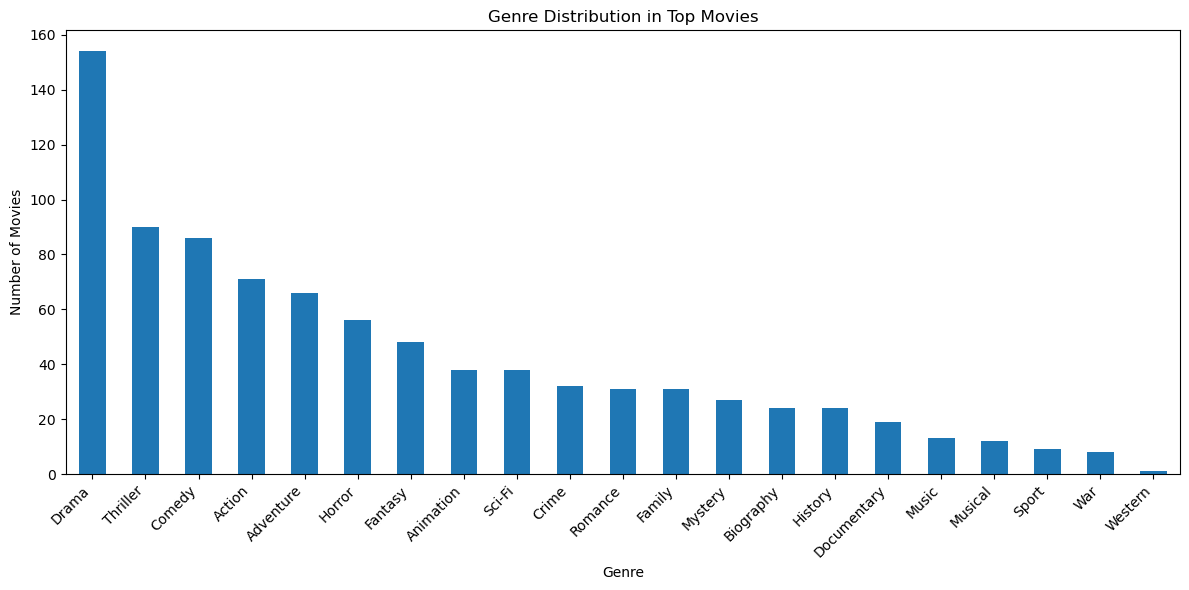

In [10]:
# Genre Frequency Analysis
genre_counts = df_exploded['Genres'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution in Top Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()